We will define a custom model to implement our functional wide and deep model, first will do it casual with functional api then will use a class to clean up the code

https://github.com/ANKITPODDER2000/Tensorflow-Advance/blob/main/Custom_Models_Layers_and_Loss_Functions_with_TensorFlow/Week4/complex_model.ipynb

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.nn import relu
from tensorflow.keras.utils import plot_model

print("Using tf version: ", tf.__version__)

Using tf version:  2.6.0


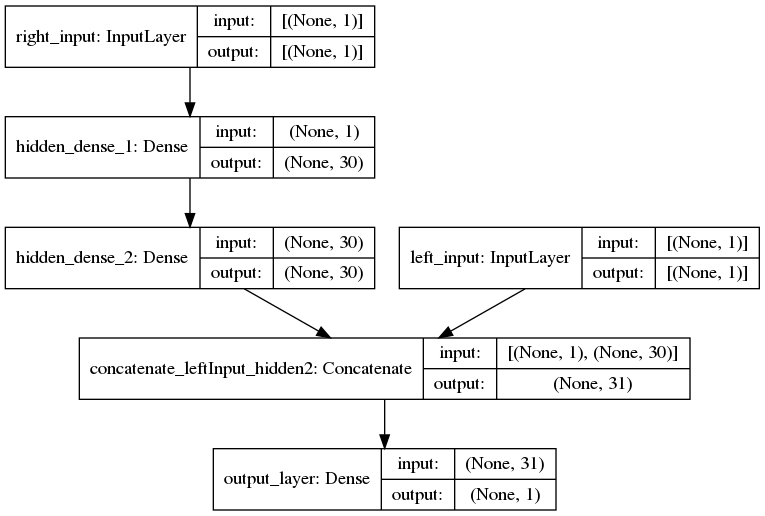

In [5]:
# defininig a multi input wide-deep model using functional api 
right_input = Input(shape=(1,), name="right_input")
left_input = Input(shape=(1,), name="left_input")

hidden_1 = Dense(30, activation="relu", name="hidden_dense_1")(right_input)
hidden_2 = Dense(30, activation="relu", name="hidden_dense_2")(hidden_1)

concat_layer = concatenate([left_input, hidden_2], name="concatenate_leftInput_hidden2")

out = Dense(1, name="output_layer")(concat_layer)

model  = Model(inputs=[right_input, left_input], outputs = out)

plot_model(model, to_file="custom_model_basic_1.png", show_shapes=True, show_layer_names=True)




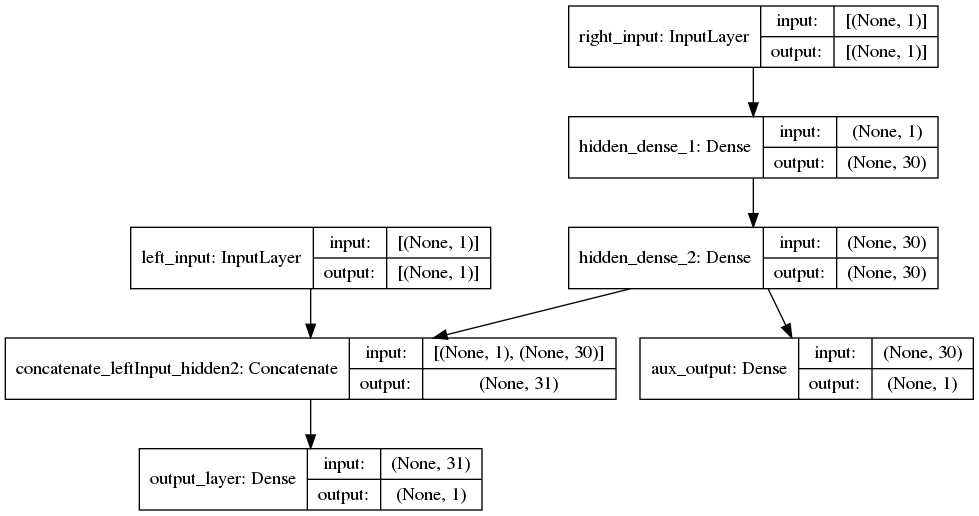

In [6]:
# now we do the same thing but we add an auxelary output from dense 2

right_input = Input(shape=(1,), name="right_input")
left_input = Input(shape=(1,), name="left_input")

hidden_1 = Dense(30, activation="relu", name="hidden_dense_1")(right_input)
hidden_2 = Dense(30, activation="relu", name="hidden_dense_2")(hidden_1)

concat_layer = concatenate([left_input, hidden_2], name="concatenate_leftInput_hidden2")

out = Dense(1, name="output_layer")(concat_layer)
out_aux = Dense(1, name="aux_output")(hidden_2)

model  = Model(inputs=[right_input, left_input], outputs = [out, out_aux])

plot_model(model, to_file="custom_model_basic_1.png", show_shapes=True, show_layer_names=True)

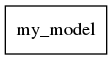

In [7]:
## Now we will do neatly put our wide and deep model into a class

class MyModel(Model):
    def __init__(self, units= 32, activation='relu', **kwargs):
        super().__init__()
        self.hidden1 = Dense(units=32, activation=activation, name="hidden1")
        self.hidden2 = Dense(units=32, activation=activation, name="hidden2")
        self.main_output = Dense(1)
        self.aux_output = Dense(1)
        
    def call(self, inputs):
        right_input , left_input = inputs
        hidden1 = self.hidden1(right_input)
        hidden2 = self.hidden2(hidden1)
        concat = concatenate([left_input, hidden_2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden_2)
        return main_output, aux_output
mon_model = MyModel()
plot_model(mon_model, to_file="custom_model_basic_1.png", show_shapes=True, show_layer_names=True)


In [ ]:
#tadaaaa no that whole model is just a block and can be a part of an even bigger model!